In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
from LogisticRegression import LogisticModel

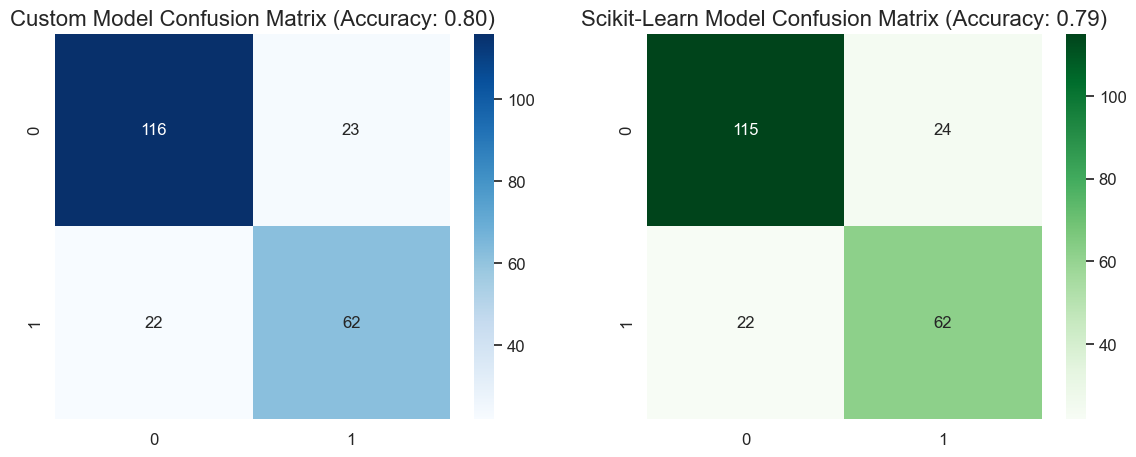

Custom Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       139
           1       0.73      0.74      0.73        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

Scikit-Learn Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       139
           1       0.72      0.74      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [6]:
# Splitting features and target
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Advanced preprocessing for numeric features with optional KNN Imputer for robustness
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),  # Robust imputation for missing values
    ('scaler', StandardScaler())
])

# Categorical features processing with optional label encoding for rare categories
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Final model pipelines with logistic regression
pipeline_custom_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticModel(
            learning_rate=0.01,
            epochs=200,
            batch_size=64,
            decay=0.001,
            decay_type='adaptive',
            regularization=0.001,
            regularization_type='L2',
            momentum=0.9,
            validation_split=0.2,
            patience=10,
            clip_value=1.0,
            verbose=0  # Disable verbose output for clean comparison
        ))
])

pipeline_sklearn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200, random_state=0))
])

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train both models and evaluate
pipeline_custom_model.fit(X_train, y_train)
pipeline_sklearn_model.fit(X_train, y_train)

# Predictions
y_pred_custom = pipeline_custom_model.predict(X_test)
y_pred_sklearn = pipeline_sklearn_model.predict(X_test)

# Performance Metrics
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Confusion Matrix Plotting
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(conf_matrix_custom, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title(f'Custom Model Confusion Matrix (Accuracy: {accuracy_custom:.2f})')
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title(f'Scikit-Learn Model Confusion Matrix (Accuracy: {accuracy_sklearn:.2f})')
plt.show()

# Print classification reports
print("Custom Model Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("Scikit-Learn Model Classification Report:")
print(classification_report(y_test, y_pred_sklearn))